In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lcn = pd.read_csv(r'D:\Datasets\LungCapData.csv')

In [3]:
lcn.head()

LungCap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no

In [4]:
### PS : build the predictive model which can predict the lung capacity of the person
## where lungcap is the target variable and rest are all independent

In [5]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
lcn.Smoke = lcn.Smoke.replace({'no':0,'yes':1})
lcn.Caesarean = lcn.Caesarean.replace({'no':0,'yes':1})
lcn.Gender = lcn.Gender.replace({'male':1,'female':0})

In [7]:
lcn.head()

LungCap  Age  Height  Smoke  Gender  Caesarean
0    6.475    6    62.1      0       1          0
1   10.125   18    74.7      1       0          0
2    9.550   16    69.7      0       0          1
3   11.125   14    71.0      0       1          0
4    4.800    5    56.9      0       1          0

In [8]:
from sklearn.model_selection import train_test_split
lcn_train, lcn_test = train_test_split(lcn, test_size = .2)

In [9]:
lcn_train_x = lcn_train.iloc[:,1:]
lcn_train_y = lcn_train.iloc[:,0]

In [10]:
lcn_test_x = lcn_test.iloc[:,1:]
lcn_test_y = lcn_test.iloc[:,0]

In [11]:
lcn.head()

LungCap  Age  Height  Smoke  Gender  Caesarean
0    6.475    6    62.1      0       1          0
1   10.125   18    74.7      1       0          0
2    9.550   16    69.7      0       0          1
3   11.125   14    71.0      0       1          0
4    4.800    5    56.9      0       1          0

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linreg = LinearRegression()

In [14]:
linreg.fit(lcn_train_x, lcn_train_y)   ## model has been created

LinearRegression()

In [15]:
Rsquare = linreg.score(lcn_train_x, lcn_train_y)
Rsquare

0.8509657061936736

In [16]:
## Adjusted square

N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N-1)/(N-K-1)
AdjRsquare

0.8496674980594722

In [17]:
lcn_train_x.shape

(580, 5)

In [18]:
linreg.coef_

array([ 0.16991257,  0.25556086, -0.6325357 ,  0.45288811, -0.22408001])

In [19]:
linreg.intercept_

-10.916360258299996

In [20]:
## lets do the prediction

In [21]:
pred_train = linreg.predict(lcn_train_x)

In [22]:
pred_test = linreg.predict(lcn_test_x)

In [23]:
error_train = lcn_train_y - pred_train
error_test  = lcn_test_y - pred_test

In [24]:
## lets check the assumption on the train data

np.mean(error_train)  # mean error terms should be zero

2.2702146675955786e-15

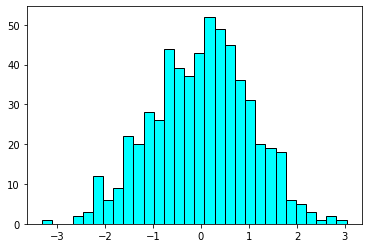

In [25]:
plt.hist(error_train, bins = 30, color = 'aqua', edgecolor = 'k');

In [26]:
pred_actual = pd.DataFrame({'Actual' : lcn_train_y,'Predicted' : pred_train})
pred_actual.head()

Actual  Predicted
10   11.500  12.065636
608   4.825   4.883987
601  11.800  11.376819
456   6.825   7.460525
472  10.650   9.200198

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


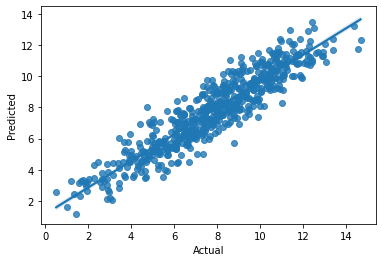

In [27]:
sns.regplot('Actual' , 'Predicted', data = pred_actual);

In [28]:
## MAPE on test data

mape_test = np.mean(np.abs(error_test / lcn_test_y)*100)

In [29]:
Acc = 100 - mape_test
Acc

87.24092927810582

In [30]:
## home assignment
## in property price train .. there is a column at the end ( righ hand side) price column
# price column is your target variable

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
ppt = pd.read_csv(r'D:\Datasets\Property_Price_Train.csv')

In [33]:
ppt.head()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type  ... Pool_Area Pool_Quality  \
0            Reg          Lvl       AllPub  ...         0          NaN   
1            Reg          Lvl       AllPub  ...         0          NaN   
2            IR1          Lvl       AllPub  ...         0          NaN   
3            IR1          Lvl       AllPub  ...         0          NaN   
4            IR1          Lvl       AllPub  ...         0          NaN   

  Fence_Quality Miscellaneous_Feature Miscellaneous_Value Month_Sold  \
0           NaN                   NaN                   0          2   
1           NaN                   NaN                   0          5   
2           NaN                   NaN                   0          9   
3           NaN                   NaN                   0          2   
4           NaN                   NaN                   0         12   

  Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0      2008         WD          Normal      208500  
1      2007         WD          Normal      181500  
2      2008         WD          Normal      223500  
3      2006         WD         Abnorml      140000  
4      2008         WD          Normal      250000  

[5 rows x 81 columns]

In [34]:
ppt

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ... Pool_Area  \
0          NaN            Reg          Lvl       AllPub  ...         0   
1          NaN            Reg          Lvl       AllPub  ...         0   
2          NaN            IR1          Lvl       AllPub  ...         0   
3          NaN            IR1          Lvl       AllPub  ...         0   
4          NaN            IR1          Lvl       AllPub  ...         0   
...        ...            ...          ...          ...  ...       ...   
1454     Paved            Reg          Lvl       AllPub  ...         0   
1455       NaN            Reg          Lvl       AllPub  ...         0   
1456       NaN            Reg          Lvl       AllPub  ...         0   
1457       NaN            Reg          Lvl       AllPub  ...         0   
1458       NaN            Reg          Lvl       AllPub  ...         0   

     Pool_Quality Fence_Quality Miscellaneous_Feature Miscellaneous_Value  \
0             NaN           NaN                   NaN                   0   
1             NaN           NaN                   NaN                   0   
2             NaN           NaN                   NaN                   0   
3             NaN           NaN                   NaN                   0   
4             NaN           NaN                   NaN                   0   
...           ...           ...                   ...                 ...   
1454          NaN           NaN                   NaN                   0   
1455          NaN           NaN                   NaN                   0   
1456          NaN         MnPrv                   NaN                   0   
1457          NaN         GdPrv                  Shed                2500   
1458          NaN           NaN                   NaN                   0   

     Month_Sold Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0             2      2008         WD          Normal      208500  
1             5      2007         WD          Normal      181500  
2             9      2008         WD          Normal      223500  
3             2      2006         WD         Abnorml      140000  
4            12      2008         WD          Normal      250000  
...         ...       ...        ...             ...         ...  
1454         10      2009         WD          Normal      185000  
1455          8      2007         WD          Normal      175000  
1456          2      2010         WD          Normal      210000  
1457          5      2010         WD          Normal      266500  
1458          4      2010         WD          Normal      142125  

[1459 rows x 81 columns]

In [35]:
ppt.isnull()

Id  Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0     False           False         False       False     False      False   
1     False           False         False       False     False      False   
2     False           False         False       False     False      False   
3     False           False         False       False     False      False   
4     False           False         False       False     False      False   
...     ...             ...           ...         ...       ...        ...   
1454  False           False         False       False     False      False   
1455  False           False         False       False     False      False   
1456  False           False         False       False     False      False   
1457  False           False         False       False     False      False   
1458  False           False         False       False     False      False   

      Lane_Type  Property_Shape  Land_Outline  Utility_Type  ...  Pool_Area  \
0          True           False         False         False  ...      False   
1          True           False         False         False  ...      False   
2          True           False         False         False  ...      False   
3          True           False         False         False  ...      False   
4          True           False         False         False  ...      False   
...         ...             ...           ...           ...  ...        ...   
1454      False           False         False         False  ...      False   
1455       True           False         False         False  ...      False   
1456       True           False         False         False  ...      False   
1457       True           False         False         False  ...      False   
1458       True           False         False         False  ...      False   

      Pool_Quality  Fence_Quality  Miscellaneous_Feature  Miscellaneous_Value  \
0             True           True                   True                False   
1             True           True                   True                False   
2             True           True                   True                False   
3             True           True                   True                False   
4             True           True                   True                False   
...            ...            ...                    ...                  ...   
1454          True           True                   True                False   
1455          True           True                   True                False   
1456          True          False                   True                False   
1457          True          False                  False                False   
1458          True           True                   True                False   

      Month_Sold  Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0          False      False      False           False       False  
1          False      False      False           False       False  
2          False      False      False           False       False  
3          False      False      False           False       False  
4          False      False      False           False       False  
...          ...        ...        ...             ...         ...  
1454       False      False      False           False       False  
1455       False      False      False           False       False  
1456       False      False      False           False       False  
1457       False      False      False           False       False  
1458       False      False      False           False       False  

[1459 rows x 81 columns]

In [36]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [37]:
ppt.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [38]:
ppt

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
5        6              50          RLD        85.0     14115     Paved   
6        7              20          RLD        75.0     10084     Paved   
7        8              60          RLD         NaN     10382     Paved   
8        9              50          RMD        51.0      6120     Paved   
9       10             190          RLD        50.0      7420     Paved   
10      11              20          RLD        70.0     11200     Paved   
11      12              60          RLD        85.0     11924     Paved   
12      13              20          RLD         NaN     12968     Paved   
13      14              20          RLD        91.0     10652     Paved   
14      15              20          RLD         NaN     10920     Paved   
15      16              45          RMD        51.0      6120     Paved   
16      17              20          RLD         NaN     11241     Paved   
17      18              90          RLD        72.0     10791     Paved   
18      19              20          RLD        66.0     13695     Paved   
19      20              20          RLD        70.0      7560     Paved   
20      21              60          RLD       101.0     14215     Paved   
21      22              45          RMD        57.0      7449     Paved   
22      23              20          RLD        75.0      9742     Paved   
23      24             120          RMD        44.0      4224     Paved   
24      25              20          RLD         NaN      8246     Paved   
25      26              20          RLD       110.0     14230     Paved   
26      27              20          RLD        60.0      7200     Paved   
27      28              20          RLD        98.0     11478     Paved   
28      29              20          RLD        47.0     16321     Paved   
29      30              30          RMD        60.0      6324     Paved   
30      31              70       Commer        50.0      8500     Paved   
31      32              20          RLD         NaN      8544     Paved   
32      33              20          RLD        85.0     11049     Paved   
33      34              20          RLD        70.0     10552     Paved   
34      35             120          RLD        60.0      7313     Paved   
35      36              60          RLD       108.0     13418     Paved   
36      37              20          RLD       112.0     10859     Paved   
37      38              20          RLD        74.0      8532     Paved   
38      39              20          RLD        68.0      7922     Paved   
39      40              90          RLD        65.0      6040     Paved   
40      41              20          RLD        84.0      8658     Paved   
41      42              20          RLD       115.0     16905     Paved   
42      43              85          RLD         NaN      9180     Paved   
43      44              20          RLD         NaN      9200     Paved   
44      45              20          RLD        70.0      7945     Paved   
45      46             120          RLD        61.0      7658     Paved   
46      47              50          RLD        48.0     12822     Paved   
47      48              20          FVR        84.0     11096     Paved   
48      49             190          RMD        33.0      4456     Paved   
49      50              20          RLD        66.0      7742     Paved   
50      51              60          RLD         NaN     13869     Paved   
51      52              50          RMD        52.0      6240     Paved   
52      53              90       

In [39]:
import os

In [40]:
os.getcwd()

'C:\\Users\\harsh\\Documents\\Notes'

In [41]:
ppt.Lot_Extent.mean()

70.04583333333333

In [42]:
ppt.Lane_Type.value_counts()

Grvl     50
Paved    41
Name: Lane_Type, dtype: int64

In [43]:
ppt.Brick_Veneer_Type.value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: Brick_Veneer_Type, dtype: int64

In [44]:
ppt.Brick_Veneer_Area.value_counts()

0.0       860
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [45]:
ppt.Basement_Height.value_counts()                

TA    648
Gd    618
Ex    121
Fa     35
Name: Basement_Height, dtype: int64

In [46]:
# for col in ppt.columns[ppt.isnull().sum()>0]:
#     if len(ppt[col].unique()) <10:
#         print(f"UNique value in {col} are:\n{ppt[col].value_counts()}")
#         print('--------------------------------------------------------------')

In [47]:
ppt.Basement_Condition.value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: Basement_Condition, dtype: int64

In [48]:
ppt.Exposure_Level.value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: Exposure_Level, dtype: int64

In [49]:
ppt.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [50]:
ppt.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      45
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [51]:
ppt.Electrical_System.value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical_System, dtype: int64

In [52]:
ppt.Fireplace_Quality.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: Fireplace_Quality, dtype: int64

In [53]:
ppt.Garage.value_counts()

Attchd     869
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2TFes        5
2Types       1
Name: Garage, dtype: int64

In [54]:
ppt.Garage_Built_Year.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1970.0    20
1996.0    20
1957.0    20
1965.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [55]:
ppt.Garage_Finish_Year.value_counts()

Unf    605
RFn    422
Fin    351
Name: Garage_Finish_Year, dtype: int64

In [56]:
ppt.Garage_Quality.value_counts()

TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: Garage_Quality, dtype: int64

In [57]:
ppt.Garage_Condition.value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [58]:
ppt.Pool_Quality.value_counts()

Gd    3
Ex    2
Fa    2
Name: Pool_Quality, dtype: int64

In [59]:
ppt.Fence_Quality.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence_Quality, dtype: int64

In [60]:
ppt.Miscellaneous_Feature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: Miscellaneous_Feature, dtype: int64

In [61]:
ppt.columns[ ppt.isnull().sum() >0 ]

Index(['Lot_Extent', 'Lane_Type', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical_System',
       'Fireplace_Quality', 'Garage', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature'],
      dtype='object')

In [62]:
ppt.Lot_Extent            = ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())
ppt.Lane_Type             = ppt.Lane_Type.fillna('Grvl')
ppt.Brick_Veneer_Type     = ppt.Brick_Veneer_Type.fillna('None')
ppt.Brick_Veneer_Area     = ppt.Brick_Veneer_Area.fillna(0)
ppt.Basement_Height       = ppt.Basement_Height.fillna('TA')
ppt.Basement_Condition    = ppt.Basement_Condition.fillna('TA')
ppt.Exposure_Level        = ppt.Exposure_Level.fillna('No')
ppt.BsmtFinType1          = ppt.BsmtFinType1.fillna('Unf')
ppt.BsmtFinType2          = ppt.BsmtFinType2.fillna('Unf')
ppt.Electrical_System     = ppt.Electrical_System.fillna('SBrkr')
ppt.Fireplace_Quality     = ppt.Fireplace_Quality.fillna('Gd')
ppt.Garage                = ppt.Garage.fillna('Attchd')
ppt.Garage_Built_Year     = ppt.Garage_Built_Year.fillna(2005)
ppt.Garage_Finish_Year    = ppt.Garage_Finish_Year.fillna('Unf')
ppt.Garage_Quality        = ppt.Garage_Quality.fillna('TA')
ppt.Garage_Condition      = ppt.Garage_Condition.fillna('TA')
ppt.Pool_Quality          = ppt.Pool_Quality.fillna('Gd')
ppt.Fence_Quality         = ppt.Fence_Quality.fillna('MnPrv')
ppt.Miscellaneous_Feature = ppt.Miscellaneous_Feature.fillna('Shed')

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()

In [65]:
ppt[ppt.select_dtypes(include='object').columns] = ppt[ppt.select_dtypes(include='object').columns].apply(le.fit_transform)

In [66]:
from sklearn.model_selection import train_test_split
ppt_train, ppt_test = train_test_split(ppt, test_size = 0.2)

In [67]:
ppt_train_x = ppt_train.iloc[:, 0: -1]
ppt_train_y = ppt_train.iloc[:,    -1]

In [68]:
ppt_test_x = ppt_test.iloc[:, 0: -1]
ppt_test_y = ppt_test.iloc[:,    -1]

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linreg = LinearRegression()

In [71]:
linreg.fit(ppt_train_x, ppt_train_y)

LinearRegression()

In [72]:
Rsquare = linreg.score(ppt_train_x, ppt_train_y)
Rsquare

0.8576238191950237

In [73]:
N = ppt_train_x.shape[0]
K = ppt_train_x.shape[1]
AdjRsquare = 1 - (1 - Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.8471357027453017

In [74]:
ppt_train_x.shape

(1167, 80)

In [75]:
linreg.coef_

array([-1.18650937e+00, -8.07004437e+01, -1.57262303e+03, -1.60548763e+02,
        3.16419535e-01,  2.92796772e+04, -7.86871476e+03, -7.40411186e+02,
        3.84754782e+03, -4.60331514e+04, -8.28682294e+02,  9.70084609e+03,
        3.85446956e+02, -3.42889830e+02, -9.31141082e+03, -2.73980897e+03,
       -9.24143283e+02,  1.07501517e+04,  6.16653548e+03,  1.78011540e+02,
        5.66543416e+00,  2.16947546e+03,  2.87599835e+04, -1.03045763e+03,
        6.20375366e+02,  4.70013761e+03,  3.50356080e+01, -9.76945189e+03,
        2.95380488e+02,  1.06173580e+03, -9.82614079e+03,  1.55416258e+03,
       -3.41737390e+03, -4.09282295e+02,  6.75023671e+00,  6.08651916e+02,
        6.00915964e+00, -3.16607150e+00,  9.59332392e+00, -2.36437588e+03,
       -9.38790777e+02, -3.83615072e+03, -5.29877156e+02,  2.67868586e+01,
        2.70716924e+01, -4.23456105e+01,  1.15129395e+01,  6.98654884e+03,
       -2.44716787e+03,  4.74591909e+03,  5.74122647e+02, -3.17785893e+03,
       -1.20571545e+04, -

In [76]:
linreg.intercept_

1444971.3299301735

In [77]:
pred_train = linreg.predict(ppt_train_x)

In [78]:
pred_test =  linreg.predict(ppt_test_x)

In [79]:
error_train = ppt_train_y - pred_train
error_test  = ppt_test_y - pred_test

In [80]:
np.mean(error_train)

4.005205802357697e-10

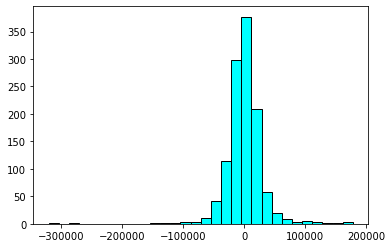

In [81]:
plt.hist(error_train, bins = 30, color = 'aqua', edgecolor = 'k');

In [82]:
pred_actual = pd.DataFrame({'Actual' : ppt_train_y,'Predicted' : pred_train})
pred_actual.head()

Actual      Predicted
765   264132  270762.281001
826   109500  100537.096113
436   116000  159396.662159
1019  213490  198061.408549
966   160000  124553.142466

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


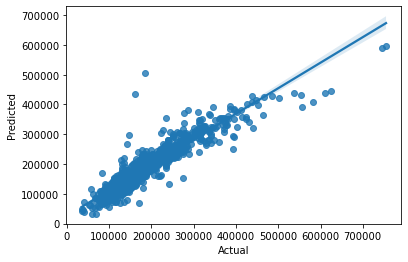

In [83]:
sns.regplot('Actual' , 'Predicted', data = pred_actual);

In [84]:
mape_test = np.mean(np.abs(error_test / lcn_test_y)*100)

In [85]:
Acc = 100 - mape_test
Acc

-287692.7460052835